## **Background**

Following is considered and based on the dataset provided
- Using Cleveland dataset since it is considered to have the more accurate data
- Using the processed dataset to maintain the data integrity
- Manually added the 14 headers of the attributes to the file before processing

## **Data Exploration & analysis**

Start off with reading the processed file and creating a dataframe using `pandas`

In [2]:
import pandas as pd

file_path = "processed.cleveland.data.csv"

# import a csv file named 'data.csv'
cleveland_df = pd.read_csv(file_path)

**Initial data set information**

In [3]:
cleveland_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


**Data cleanup**

Check for missing or invalid data

In [4]:
cleveland_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [5]:
cleveland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Replace ? with 0. ? was found in few rows replacing with zeros them to make the dataset ready for classification.

In [6]:
cleveland_df = cleveland_df.replace('?', 0)

**Classification**

Doing a classification by dropping the `exang` (exercise induced angina (1 = yes; 0 = no)) - since it lookes like
irrelevant and has a low variance. Sort the dataset by `chol` (serum cholestoral in mg/dl) as a preliminary mesure to identify any patterns.

But to make sure of the low variance we will calculate the STD of `exang`

In [57]:
exang_std = cleveland_df['exang'].std()
print("Standard Deviation of 'exang':", exang_std)

Standard Deviation of 'exang': 0.46979446452231655


In [45]:
from sklearn.feature_selection import SelectKBest, f_classif

X = cleveland_df.drop('exang', axis=1)  # Features
y = cleveland_df['exang']  # exang

selector = SelectKBest(score_func=f_classif, k=13)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[feature_indices]

# Create a new DataFrame with selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Sort the DataFrame by a specific feature column
sorted_df = X_selected_df.sort_values(by='chol', ascending=False)

# Reset the index of the sorted DataFrame
sorted_df.reset_index(drop=True, inplace=True)

sorted_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,num
0,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,1.6,2.0,0.0,7.0,0
1,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.8,1.0,1.0,3.0,0
2,56.0,0.0,4.0,134.0,409.0,0.0,2.0,150.0,1.9,2.0,2.0,7.0,2
3,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,4.0,2.0,3.0,7.0,4
4,62.0,0.0,4.0,140.0,394.0,0.0,2.0,157.0,1.2,2.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,71.0,0.0,4.0,112.0,149.0,0.0,0.0,125.0,1.6,2.0,0.0,3.0,0
299,49.0,1.0,3.0,118.0,149.0,0.0,2.0,126.0,0.8,1.0,3.0,3.0,1
300,44.0,0.0,3.0,108.0,141.0,0.0,0.0,175.0,0.6,2.0,0.0,3.0,0
301,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.2,2.0,1.0,7.0,3


**Few sort operations performed here for a better look at the data**

Sort the classified dataset by `age`

In [40]:
# Sort the DataFrame by a specific feature column
sorted_df = X_selected_df.sort_values(by='age', ascending=False)

# Reset the index of the sorted DataFrame
sorted_df.reset_index(drop=True, inplace=True)

sorted_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,num
0,77.0,1.0,4.0,125.0,304.0,0.0,2.0,162.0,0.0,1.0,3.0,3.0,4
1,76.0,0.0,3.0,140.0,197.0,0.0,1.0,116.0,1.1,2.0,0.0,3.0,0
2,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,0.2,1.0,1.0,3.0,0
3,71.0,0.0,3.0,110.0,265.0,1.0,2.0,130.0,0.0,1.0,1.0,3.0,0
4,71.0,0.0,2.0,160.0,302.0,0.0,0.0,162.0,0.4,1.0,2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,35.0,1.0,4.0,126.0,282.0,0.0,2.0,156.0,0.0,1.0,0.0,7.0,1
299,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,1.0,0.0,3.0,0
300,34.0,1.0,1.0,118.0,182.0,0.0,2.0,174.0,0.0,1.0,0.0,3.0,0
301,34.0,0.0,2.0,118.0,210.0,0.0,0.0,192.0,0.7,1.0,0.0,3.0,0


Sort the classified dataset by `num` - the target variable representing the presence of heart disease (0 = no heart disease, 1-4 = different levels of heart disease severity)

In [41]:
# Sort the DataFrame by a specific feature column
sorted_df = X_selected_df.sort_values(by='num', ascending=False)

# Reset the index of the sorted DataFrame
sorted_df.reset_index(drop=True, inplace=True)

sorted_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,num
0,60.0,1.0,4.0,130.0,206.0,0.0,2.0,132.0,2.4,2.0,2.0,7.0,4
1,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,2.0,2.0,2.0,6.0,4
2,65.0,0.0,4.0,150.0,225.0,0.0,2.0,114.0,1.0,2.0,3.0,7.0,4
3,57.0,1.0,4.0,165.0,289.0,1.0,2.0,124.0,1.0,2.0,3.0,7.0,4
4,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,3.6,2.0,1.0,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,51.0,1.0,4.0,140.0,261.0,0.0,2.0,186.0,0.0,1.0,0.0,3.0,0
299,43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.2,2.0,0.0,3.0,0
300,55.0,0.0,2.0,135.0,250.0,0.0,2.0,161.0,1.4,2.0,0.0,3.0,0
301,51.0,1.0,3.0,125.0,245.0,1.0,2.0,166.0,2.4,2.0,0.0,3.0,0


## **Data Modeling & Reporting**

Logistic Regression can be a suitable algorithm to use for the provided dataset, which involves a classification task to predict the presence and severity of heart disease.

Logistic Regression is a commonly used algorithm for binary classification problems, where the target variable has two possible outcomes. In this dataset, the target variable 'num' indicates the presence of heart disease (0 = no heart disease, 1-4 = different levels of heart disease severity), making it a binary classification problem.

**Modeling using Logistic Regression**

Accuracy: 0.819672131147541
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.86        44
         1.0       0.62      0.88      0.73        17

    accuracy                           0.82        61
   macro avg       0.79      0.84      0.80        61
weighted avg       0.86      0.82      0.83        61

Confusion Matrix:
[[35  9]
 [ 2 15]]


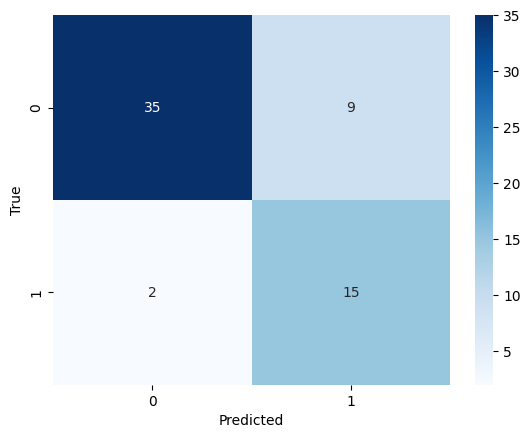

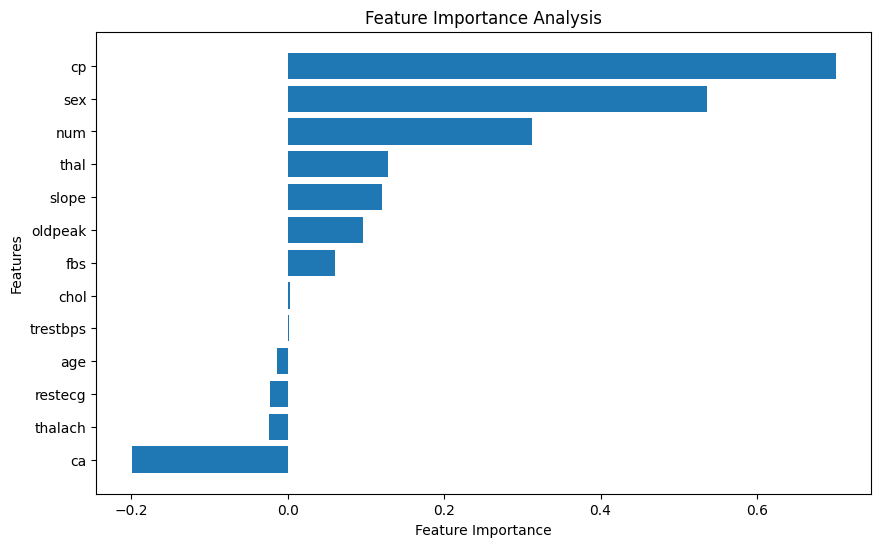

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classification model (Logistic Regression)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Visualize the confusion matrix
sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Analyze feature importance
feature_importance = model.coef_[0]
feature_names = X.columns
sorted_indices = feature_importance.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importance[sorted_indices])
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

First, the dataset is split into training and testing sets using the `train_test_split()` function from `scikit-learn`. It splits the features (X) and the target variable (y) into training and testing subsets. The test_size parameter specifies the proportion of the data to be used for testing, and random_state ensures reproducibility.

A logistic regression model is instantiated using the `LogisticRegression()` class from `scikit-learn`. The max_iter parameter is set to a large value to ensure convergence. The model is then trained on the training data using the `fit()` method.

The trained model is used to make predictions on the testing set `(X_test)` using the `predict()` method. The predicted values are stored in `y_pred`.

The accuracy of the model is calculated by comparing the predicted values `(y_pred)` with the actual values in the testing set `(y_test)`. The `accuracy_score()` function from `scikit-learn` is used for this purpose. The classification report and confusion matrix are also printed to evaluate the performance of the model.

The confusion matrix is visualized using a heatmap. The seaborn library is used to create the heatmap, and the `heatmap()` function is called with the confusion matrix as input. The `annot=True` parameter displays the values in the heatmap cells, and the `cmap="Blues"` parameter sets the color scheme. Axis labels are added, and the plot is displayed using `plt.show()`.

Finally, calculates and visualizes the feature importance based on the coefficients obtained from the trained logistic regression model. The coefficients are accessed using `model.coef_[0]`. The feature names are obtained from `X.columns`. The feature importance values and names are sorted using `argsort()`. A horizontal bar plot is created with the feature

**Reporting**

With considering the selected dataset few charts are assmbled using `matplot`

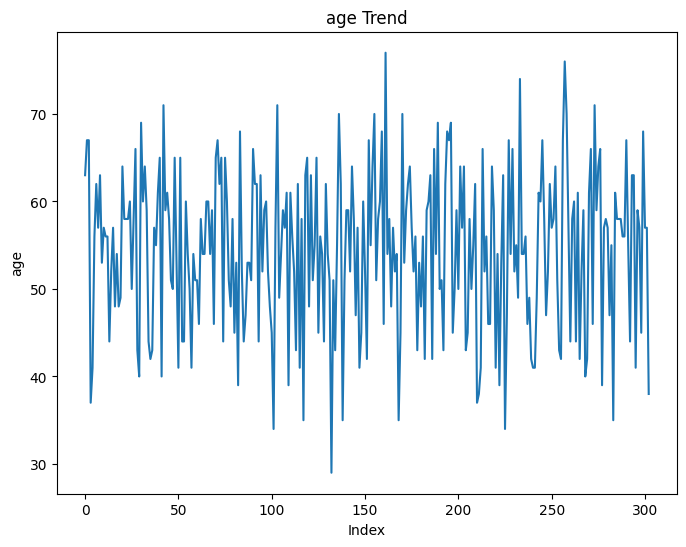

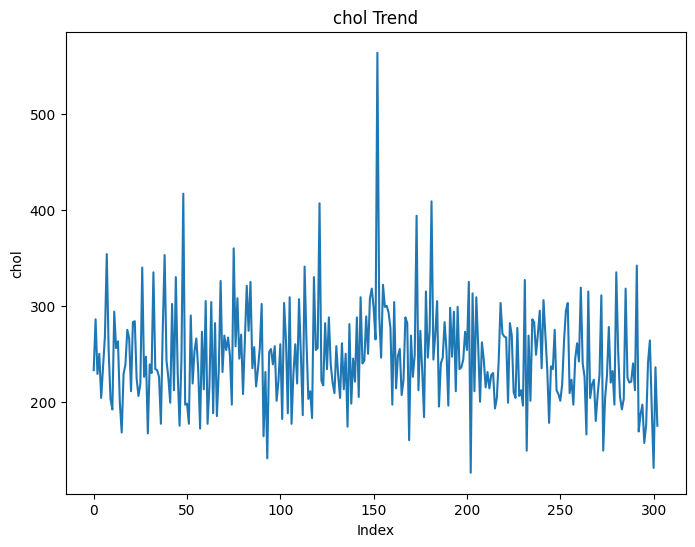

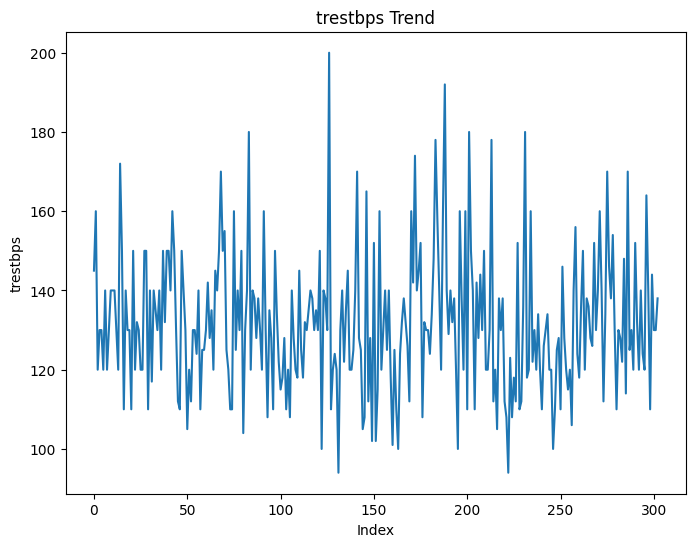

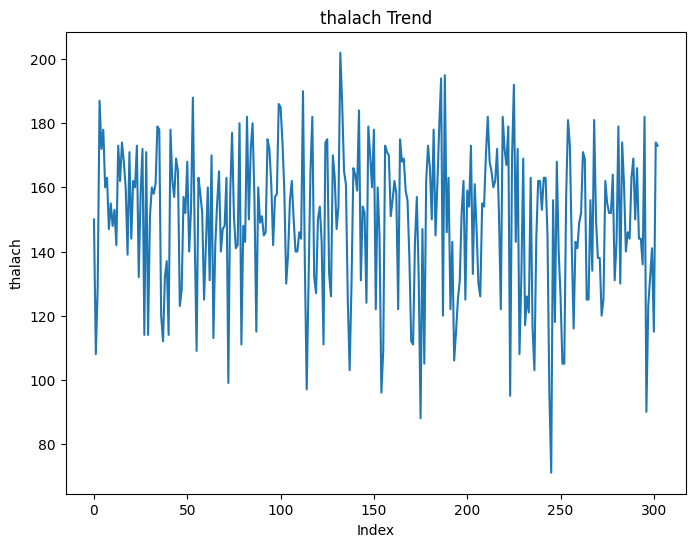

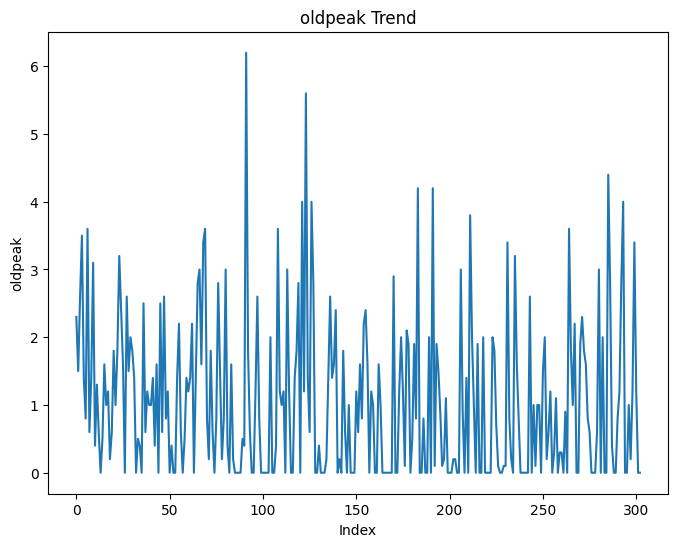

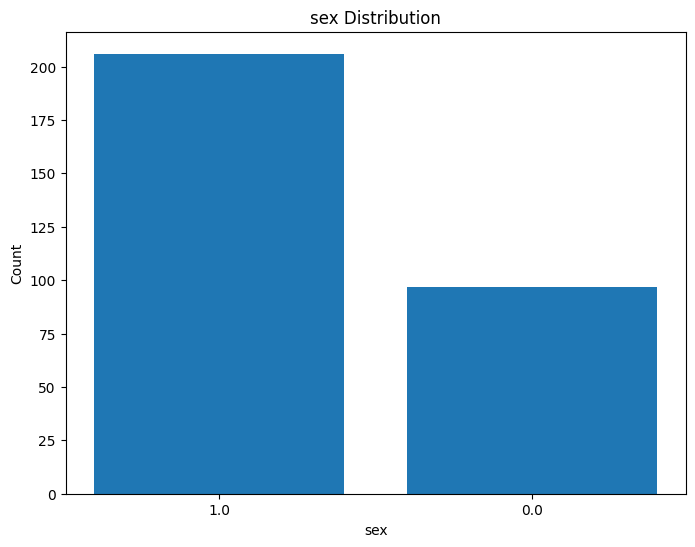

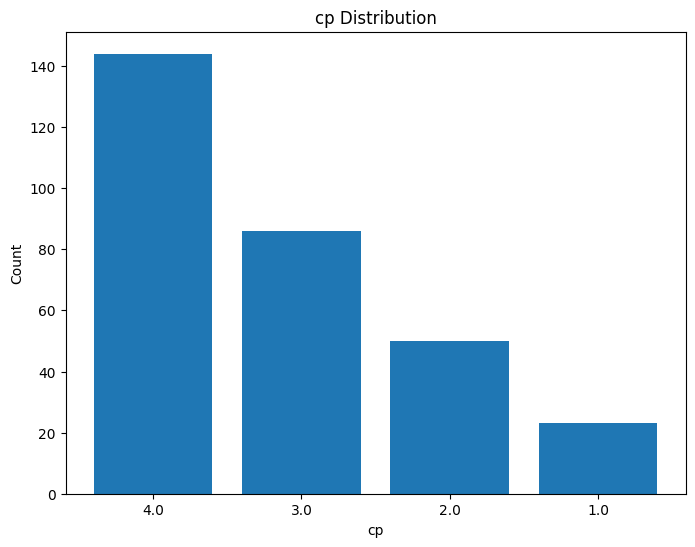

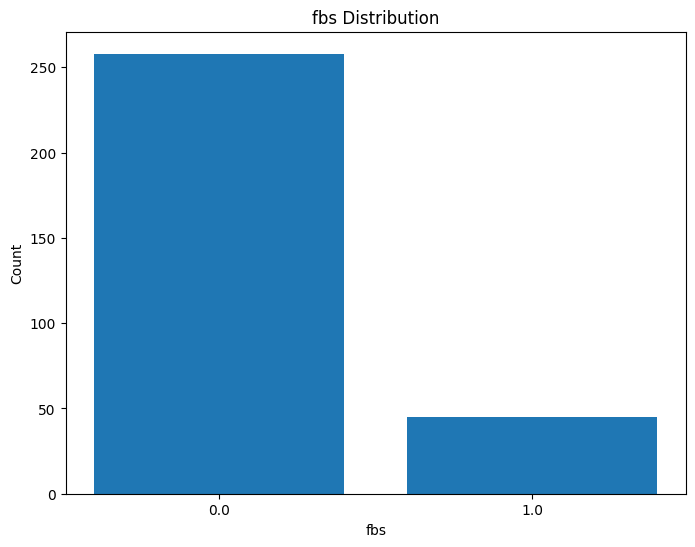

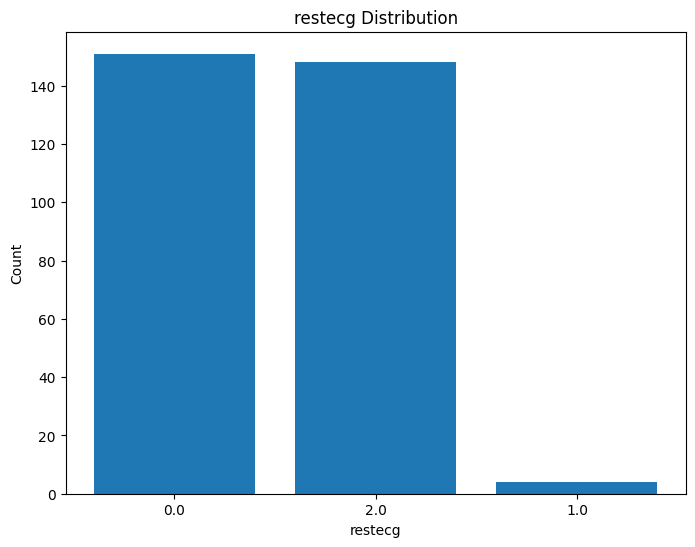

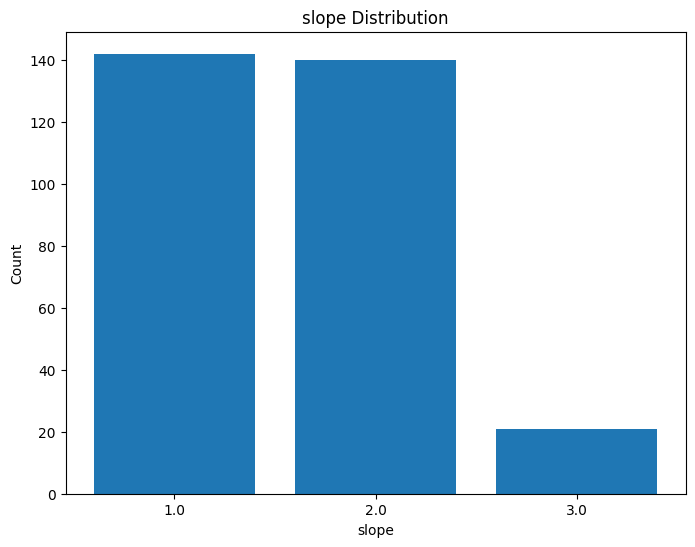

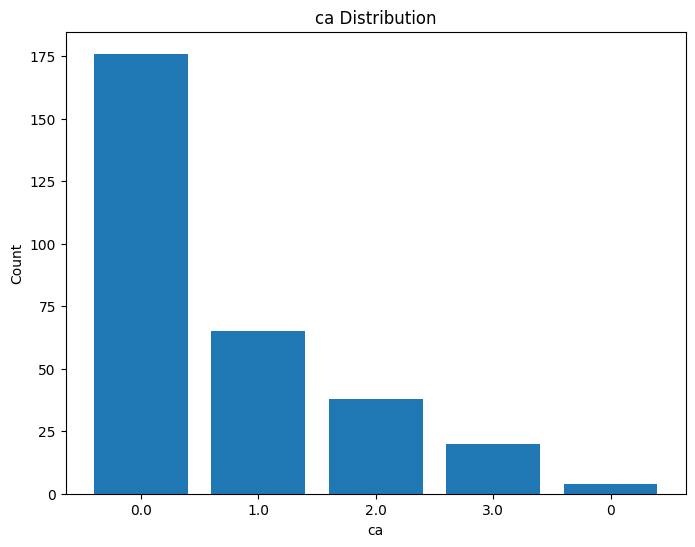

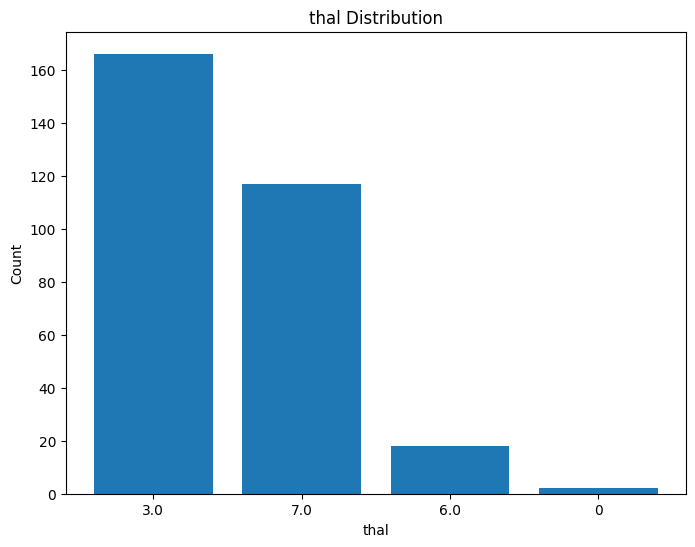

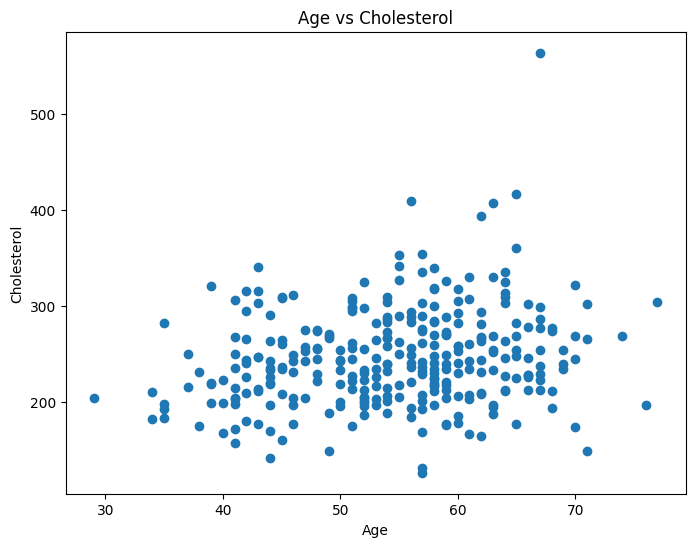

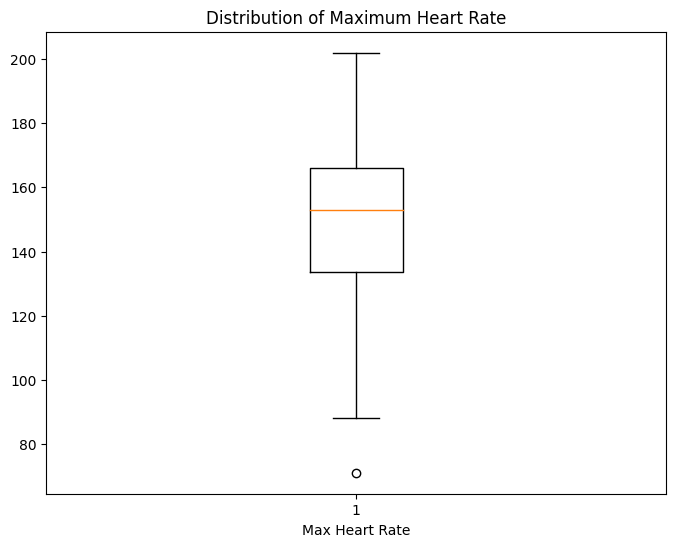

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualize trends for numerical variables
numerical_cols = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']

# Line plots for numerical variables over time or index
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.plot(cleveland_df.index, cleveland_df[col])
    plt.title(col + " Trend")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.show()

# Bar chart for categorical variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'slope', 'ca', 'thal']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    value_counts = cleveland_df[col].value_counts()
    plt.bar(value_counts.index.astype(str), value_counts.values)
    plt.title(col + " Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Scatter plot to explore relationships between variables
plt.figure(figsize=(8, 6))
plt.scatter(cleveland_df['age'], cleveland_df['chol'])
plt.title("Age vs Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

# Box plot to analyze distributions and outliers
plt.figure(figsize=(8, 6))
plt.boxplot(cleveland_df['thalach'])
plt.title("Distribution of Maximum Heart Rate")
plt.xlabel("Max Heart Rate")
plt.show()

**Conclusion**

1. Line plots for numerical variables:
   - 'age': The plot shows the trend of age over the index. It indicates how the age values change over time or index.
   - 'chol': The plot represents the trend of cholesterol levels over the index. It helps to understand the fluctuations or patterns in cholesterol levels.
   - 'trestbps': The plot shows the trend of resting blood pressure over the index. It provides insights into any variations or trends in blood pressure values.
   - 'thalach': The plot represents the trend of maximum heart rate achieved during exercise over the index. It helps in analyzing the variations or patterns in heart rate.
   - 'oldpeak': The plot indicates the trend of ST depression induced by exercise relative to rest over the index. It provides insights into the changes or patterns in ST depression values.

2. Bar chart for categorical variables:
   - 'sex': The bar chart shows the distribution of gender (male and female) in the dataset.
   - 'cp': The bar chart represents the distribution of chest pain types (categories 1, 2, 3, 4) in the dataset.
   - 'fbs': The chart displays the distribution of fasting blood sugar levels (categories 0 and 1).
   - 'restecg': The chart shows the distribution of resting electrocardiographic results (categories 0, 1, 2).
   - 'slope': The chart represents the distribution of the slope of the peak exercise ST segment (categories 1, 2, 3).
   - 'ca': The chart displays the distribution of the number of major vessels colored by fluoroscopy (categories 0, 1, 2, 3).
   - 'thal': The chart shows the distribution of the types of thalassemia (categories 3, 6, 7).

3. Scatter plot to explore relationships between variables:
   - 'age' vs 'chol': The scatter plot shows the relationship between age and cholesterol levels. It helps in understanding if there is any correlation or pattern between these two variables. The plot can provide insights into any possible relationship, such as a positive or negative correlation, clustering of points, or the presence of outliers.

4. Box plot to analyze distributions and outliers:
   - 'thalach': The box plot displays the distribution of maximum heart rate achieved during exercise. It provides information about the median, quartiles, and any potential outliers. The plot helps in analyzing the central tendency, spread, and presence of extreme values in the maximum heart rate data.
